# Analyzing Amazon Sales data

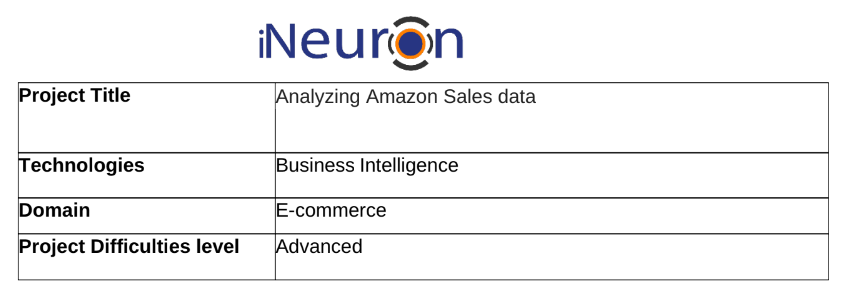

#### Problem Statement:
- Sales management has gained importance to meet increasing competition and the need
for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.

`Do ETL : Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month wise , year wise , yearly_month wise`

Find key metrics and factors and show the meaningful relationships between attributes.
Do your own research and come up with your findings.


### Importing the Libraries

In [1]:
import numpy as np   # numerical analysis
import pandas as pd  # data processing, CSV file I/O
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # statistical data visualization
import warnings
warnings.filterwarnings(action="ignore")

### Importing the data

In [2]:
sales_dataset = pd.read_csv(r"C:\Users\Abhishek\Desktop\Class Data\Internship\Analyzing Amazon Sales data\SALESDATA.csv")
sales_dataset.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,30-04-2017,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,30-04-2017,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,14-07-2017,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,14-07-2017,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,17-10-2017,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,16-10-2017,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,03-06-2017,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,03-06-2017,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,27-05-2017,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,28-05-2017,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


In [3]:
### Checking the shape
sales_dataset.shape

(65282, 20)

In [4]:
### Checking basic info
sales_dataset.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


In [5]:
sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustKey                           65282 non-null  int64  
 1   DateKey                           65282 non-null  object 
 2   Discount Amount                   65280 non-null  float64
 3   Invoice Date                      65282 non-null  object 
 4   Invoice Number                    65282 non-null  int64  
 5   Item Class                        56993 non-null  object 
 6   Item Number                       65241 non-null  object 
 7   Item                              65282 non-null  object 
 8   Line Number                       65282 non-null  int64  
 9   List Price                        65282 non-null  float64
 10  Order Number                      65282 non-null  int64  
 11  Promised Delivery Date            65282 non-null  object 
 12  Sale

In [6]:
sales_dataset.nunique()

CustKey                               615
DateKey                               559
Discount Amount                     17765
Invoice Date                          559
Invoice Number                      24681
Item Class                              2
Item Number                           983
Item                                  657
Line Number                           397
List Price                           1062
Order Number                        17798
Promised Delivery Date                592
Sales Amount                        17896
Sales Amount Based on List Price     4060
Sales Cost Amount                    5513
Sales Margin Amount                 21296
Sales Price                         14789
Sales Quantity                        281
Sales Rep                              64
U/M                                     3
dtype: int64

In [7]:
sales_dataset.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [8]:
### Checking null values
sales_dataset.isnull().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [9]:
### Checking percentage of missing values
round(sales_dataset.isnull().sum()/len(sales_dataset) *100,2)

CustKey                              0.00
DateKey                              0.00
Discount Amount                      0.00
Invoice Date                         0.00
Invoice Number                       0.00
Item Class                          12.70
Item Number                          0.06
Item                                 0.00
Line Number                          0.00
List Price                           0.00
Order Number                         0.00
Promised Delivery Date               0.00
Sales Amount                         0.00
Sales Amount Based on List Price     0.00
Sales Cost Amount                    0.00
Sales Margin Amount                  0.00
Sales Price                          0.00
Sales Quantity                       0.00
Sales Rep                            0.00
U/M                                  0.00
dtype: float64

In [10]:
# Displaying the first few rows of the DataFrame
sales_dataset.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,30-04-2017,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,30-04-2017,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,14-07-2017,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,14-07-2017,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,17-10-2017,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,16-10-2017,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,03-06-2017,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,03-06-2017,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,27-05-2017,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,28-05-2017,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


In [11]:
# Creating a copy of your DataFrame 
sales_data = sales_dataset.copy()

In [12]:
# Creating DataFrame only with necessary columns.
sales_data1 = sales_data[['CustKey', 'Item','Invoice Date',
                        'Sales Quantity','Sales Amount','Sales Amount Based on List Price','Discount Amount',
                        'Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price','Sales Price']]

In [13]:
### Checking null vaLues 
sales_data1.isnull().sum()

CustKey                             0
Item                                0
Invoice Date                        0
Sales Quantity                      0
Sales Amount                        0
Sales Amount Based on List Price    0
Discount Amount                     2
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         1
dtype: int64

In [14]:
### Removed the null values from the columns
sales_data1.dropna(subset=['Discount Amount','Sales Price'],axis=0,inplace=True)

In [15]:
### Checking null values again
sales_data1.isnull().sum()

CustKey                             0
Item                                0
Invoice Date                        0
Sales Quantity                      0
Sales Amount                        0
Sales Amount Based on List Price    0
Discount Amount                     0
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         0
dtype: int64

In [16]:
# Creating Year, Month, Quarter, Day Columns in sales_data
sales_data1['Invoice Date'] = pd.to_datetime(sales_data1['Invoice Date'])

sales_data1['Invoice_Year'] = sales_data1['Invoice Date'].dt.year
sales_data1['Invoice_Month'] = sales_data1['Invoice Date'].dt.month
sales_data1['Invoice_Quarter'] = sales_data1['Invoice Date'].dt.quarter
sales_data1['Invoice_Day'] = sales_data1['Invoice Date'].dt.day

In [17]:
# Displaying the first few rows of the DataFrame
sales_data1.head()

,CustKey,Item,Invoice Date,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,U/M,List Price,Sales Price,Invoice_Year,Invoice_Month,Invoice_Quarter,Invoice_Day
0,10000481,Urban Large Eggs,2017-04-30,1,237.91,0.00,-237.91,237.91,0.0,184,EA,0.00,237.910000,2017,4,2,30
1,10002220,Moms Sliced Turkey,2017-07-14,1,456.17,824.96,368.79,456.17,0.0,127,EA,824.96,456.170000,2017,7,3,14
2,10002220,Cutting Edge Foot-Long Hot Dogs,2017-10-17,1,438.93,548.66,109.73,438.93,0.0,127,EA,548.66,438.930000,2017,10,4,17
3,10002489,Kiwi Lox,2017-06-03,1,211.75,0.00,-211.75,211.75,0.0,160,EA,0.00,211.750000,2017,6,2,3
4,10004516,High Top Sweet Onion,2017-05-27,455,89248.66,185876.60,96627.94,89248.66,0.0,124,SE,408.52,196.150901,2017,5,2,27


In [18]:
sales_data1.dtypes

CustKey                                      int64
Item                                        object
Invoice Date                        datetime64[ns]
Sales Quantity                               int64
Sales Amount                               float64
Sales Amount Based on List Price           float64
Discount Amount                            float64
Sales Margin Amount                        float64
Sales Cost Amount                          float64
Sales Rep                                    int64
U/M                                         object
List Price                                 float64
Sales Price                                float64
Invoice_Year                                 int32
Invoice_Month                                int32
Invoice_Quarter                              int32
Invoice_Day                                  int32
dtype: object

In [19]:
# Seperating columns in continuous and categorical for univariate analysis
cont = ['Sales Amount',  'Discount Amount', 'Sales Margin Amount',
      'Sales Cost Amount', 'Sales Rep', 'List Price','Sales Price']
cat = ['Item', 'U/M']

### Univariate Analysis for Categorical columns

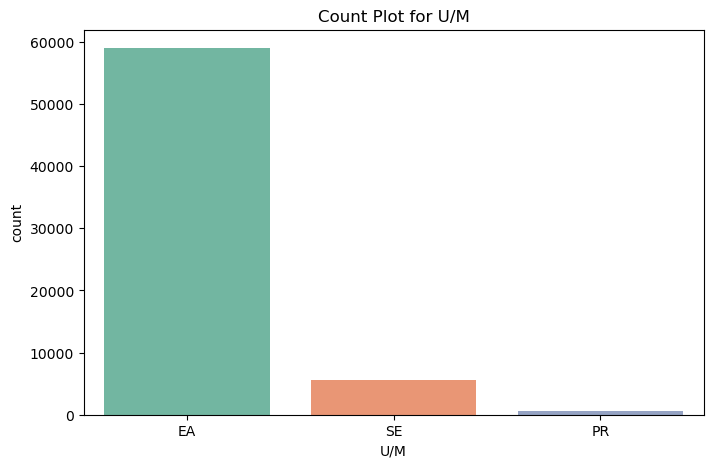

In [20]:
# Creating a count plot for the 'U/M' column
plt.figure(figsize=(8, 5))
sns.countplot(x='U/M', data=sales_data1, palette='Set2')

# Displaying the plot
plt.title('Count Plot for U/M')
plt.show()

Boxplot of  Sales Amount


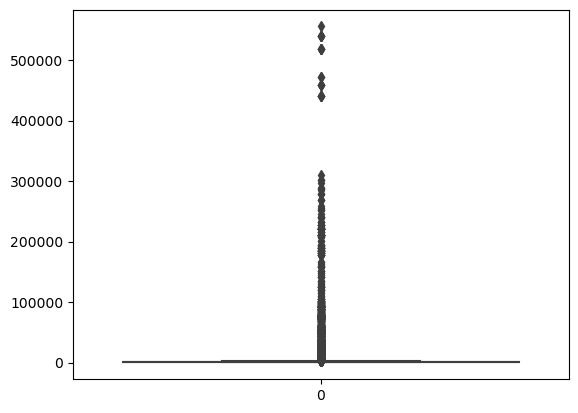

Boxplot of  Discount Amount


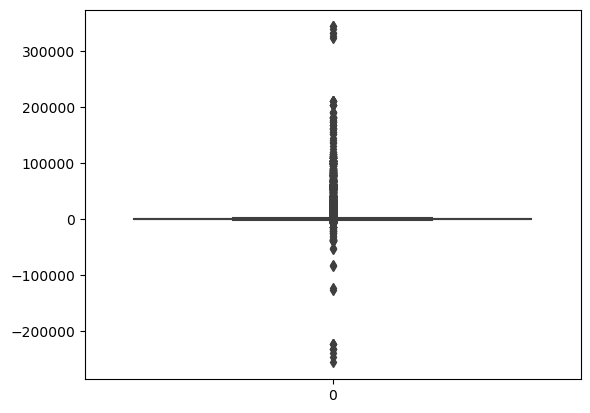

Boxplot of  Sales Margin Amount


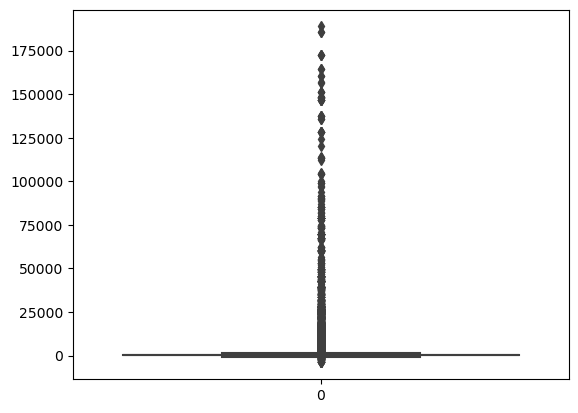

Boxplot of  Sales Cost Amount


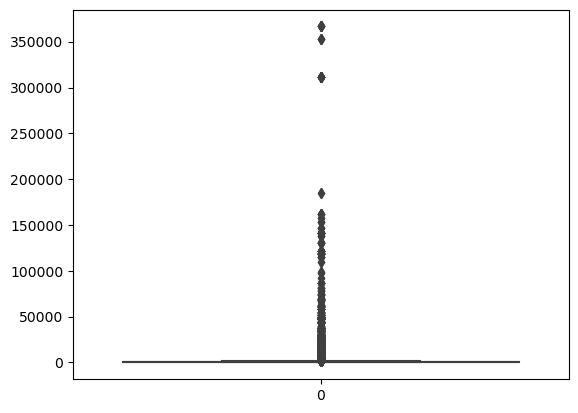

Boxplot of  Sales Rep


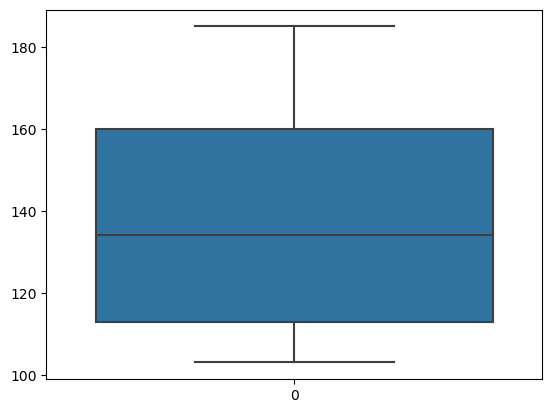

Boxplot of  List Price


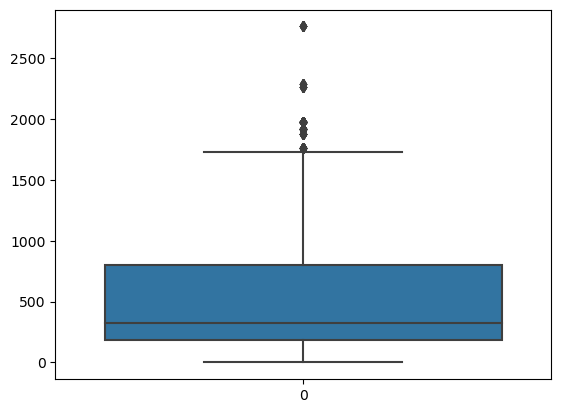

Boxplot of  Sales Price


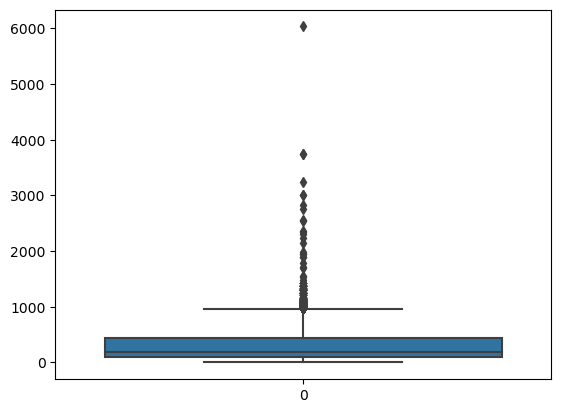

In [21]:
# Looping through continuous variables and creating boxplots
for i in cont:
    print("Boxplot of ",i)
    sns.boxplot(sales_data1[i])
    plt.show()

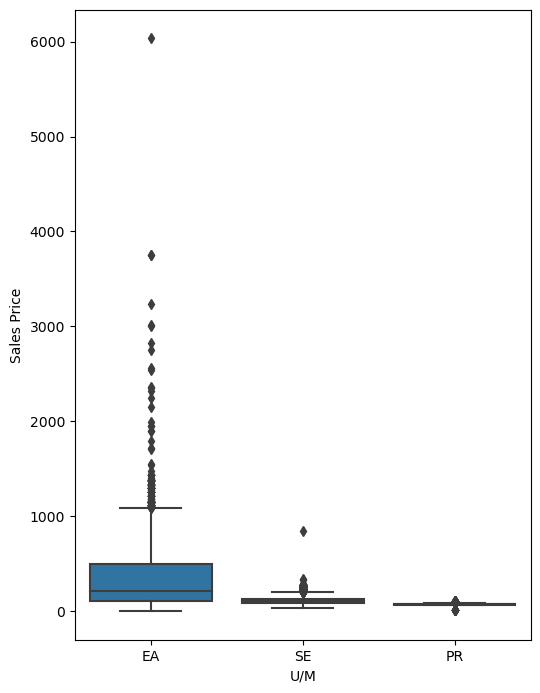

In [22]:
# Setting the figure size
plt.figure(figsize=(20, 18))

# Creating a boxplot for 'Sales Price' across different 'U/M'
plt.subplot(2,3,2)
sns.boxplot(x = 'U/M', y = 'Sales Price', data = sales_data1)

# Displaying the plot
plt.show()

### Sales Cost Amount by Year

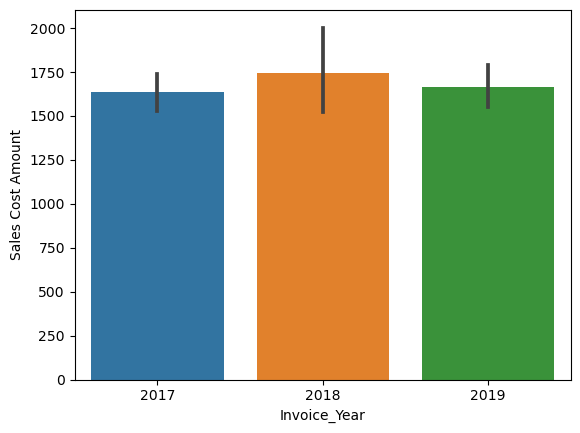

In [23]:
# Creating a bar plot for 'Sales Cost Amount' by 'Invoice Year'
sns.barplot(y = 'Sales Cost Amount', x = 'Invoice_Year', data = sales_data1)

# Displaying the plot
plt.show()

### Discount by Year

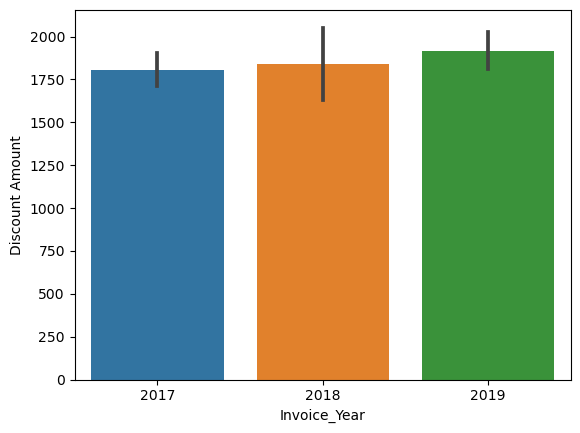

In [24]:
# Creating a bar plot for 'Discount Amount' by 'Invoice Year'
sns.barplot(y = 'Discount Amount', x = 'Invoice_Year', data = sales_data1)

# Displaying the plot
plt.show()

### Countplot For Month

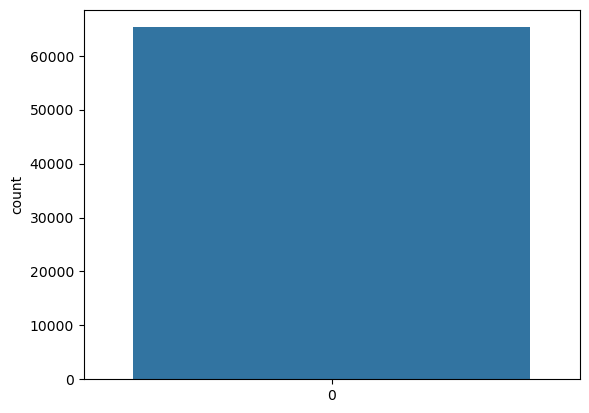

In [25]:
# Creating a count plot for 'Invoice Month'
sns.countplot(sales_data1['Invoice_Month'])

# Displaying the plot
plt.show()

### Yearly Sales

<Figure size 1000x600 with 0 Axes>

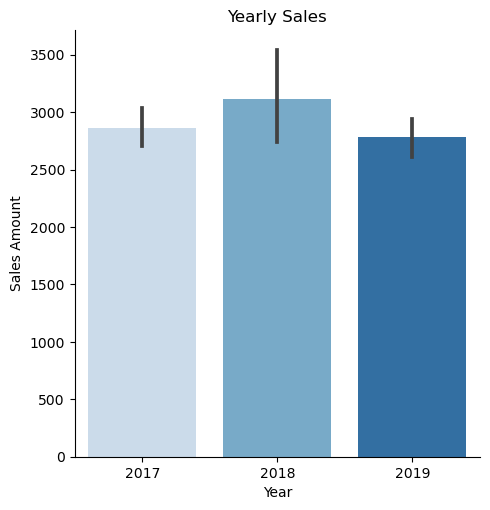

,Invoice_Year,Sales Amount
0,2017,87457304.54
1,2018,20817471.00
2,2019,77906591.65


In [26]:
# Grouping data by 'Invoice Year' and summing the sales
Yearly_Sales = sales_data1.groupby('Invoice_Year')['Sales Amount'].sum().reset_index()

# Creating a cat plot for yearly sales
plt.figure(figsize=(10, 6))
sns.catplot(y = 'Sales Amount', x = 'Invoice_Year', data = sales_data1, palette = 'Blues', kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Yearly Sales')

# Displaying the plot
plt.show()

# Displaying the aggregated sales data
Yearly_Sales[['Invoice_Year', 'Sales Amount']]

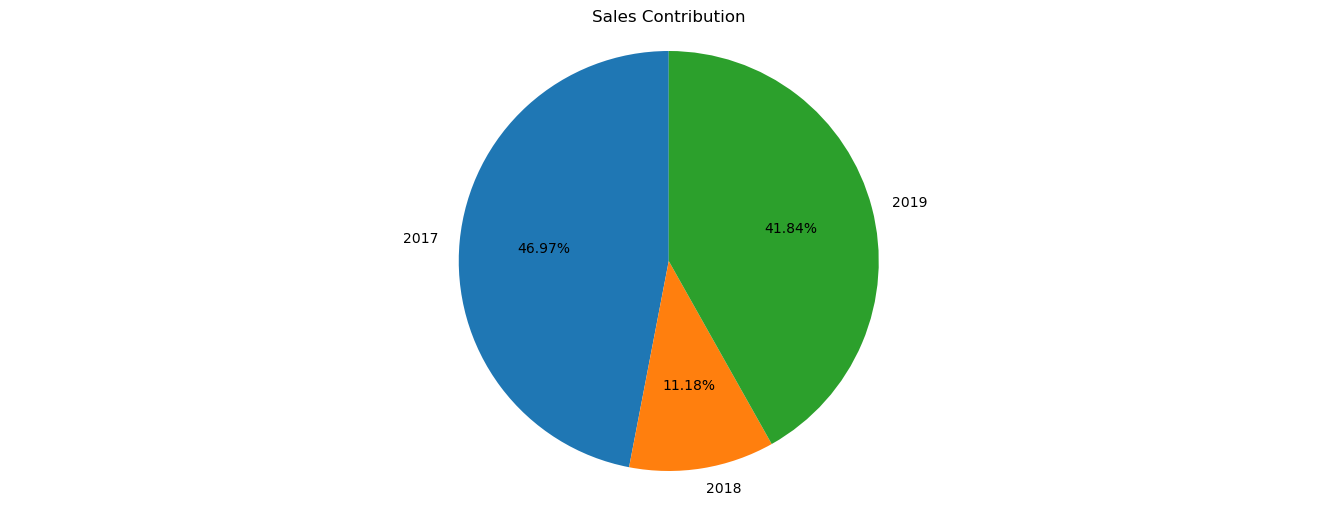

In [27]:
# Plotting Piechart to know sales share among 3 years
plt.figure(figsize=(17,6))
plt.pie('Sales Amount', labels = 'Invoice_Year', data = Yearly_Sales, autopct = '%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Sales Contribution')

# Displaying the plot
plt.show()

##### Observations:
- From 2017-2019 Highest Sales Amount 2017 > 2019 > 2018

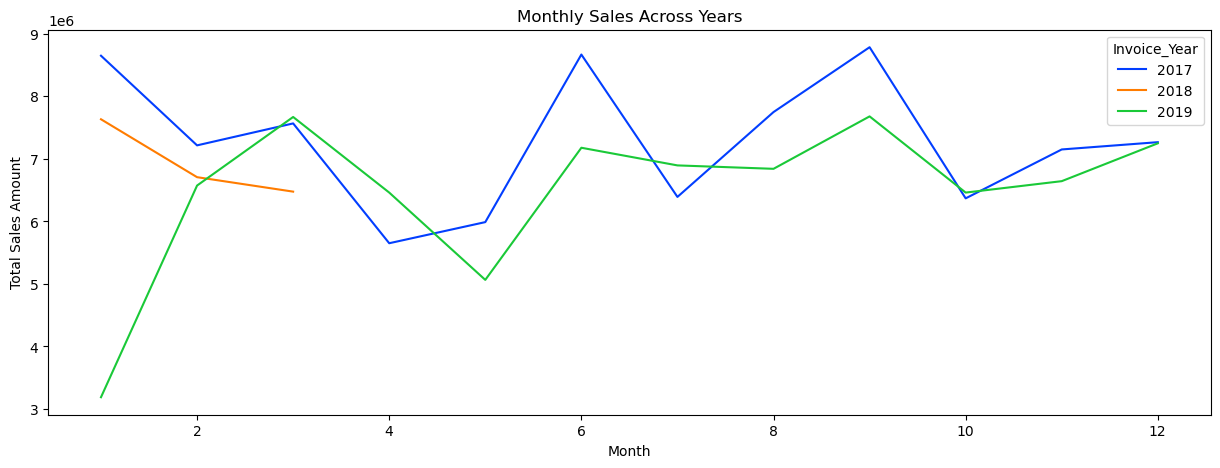

In [31]:
# Creating a line plot for 'Sales Amount' across months, grouped by 'Invoice Year'
plt.figure(figsize=(15, 5))

# Selecting numeric columns for aggregation
numeric_columns = ['Sales Quantity', 'Sales Amount', 'Sales Amount Based on List Price',
                    'Discount Amount', 'Sales Margin Amount', 'Sales Cost Amount', 'List Price', 'Sales Price']

# Grouping data by 'Invoice Year' and 'Invoice Month', summing numeric columns
monthly_sales = sales_data1.groupby(['Invoice_Year', 'Invoice_Month'])[numeric_columns].sum().reset_index()

# Plotting the line plot
sns.lineplot(x='Invoice_Month', y='Sales Amount', data=monthly_sales, hue='Invoice_Year', palette='bright')

# Displaying the plot
plt.title('Monthly Sales Across Years')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()


##### Observations:
- The Sales decreased continuously & then it started to increase from 2018 to 2019.

### MonthWise Sales

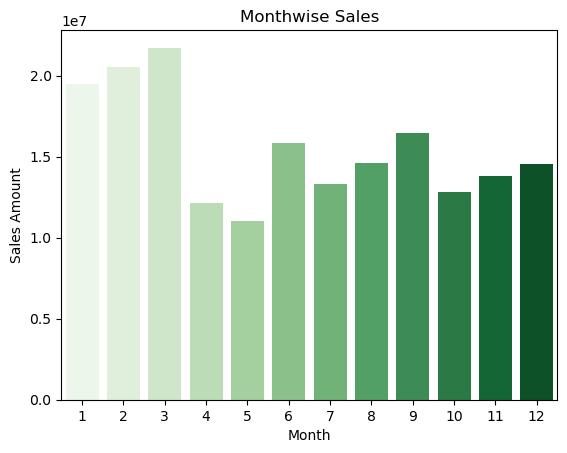

,Invoice_Month,Sales Amount
0,1,19471739.54
1,2,20497349.91
2,3,21714172.68
3,4,12112134.49
4,5,11053298.15
5,6,15847396.38
6,7,13287585.39
7,8,14590209.54
8,9,16466268.87
9,10,12829983.51


In [36]:
# Grouping data by 'Invoice Month' and summing the sales
Monthly_Sales = sales_data1.groupby('Invoice_Month')['Sales Amount'].sum().reset_index()

# Creating a bar plot for month-wise sales
sns.barplot(y = 'Sales Amount', x = 'Invoice_Month', data = Monthly_Sales, palette = 'Greens')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.title('Monthwise Sales')

# Displaying the plot
plt.show()

# Displaying the aggregated sales data
Monthly_Sales[['Invoice_Month', 'Sales Amount']]

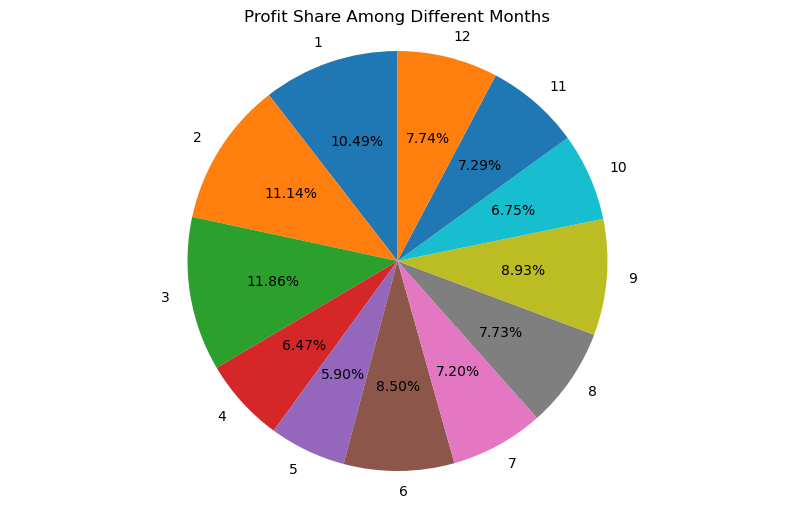

In [42]:
# Calculate the total profit for each month
monthly_profit = sales_data1.groupby('Invoice_Month')['Sales Margin Amount'].sum()

# Plotting Pie chart to show profit share among different months
plt.figure(figsize=(10, 6))
plt.pie(monthly_profit, labels=monthly_profit.index, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Profit Share Among Different Months')
plt.show()

### Yearly Monthwise Records

In [70]:
# Grouping data by 'Invoice Year' and 'Invoice Month' and summing the sales
Yearly_Monthwise_Sales = sales_data1.groupby(['Invoice_Year', 'Invoice_Month'])['Sales Amount'].sum().reset_index()

# Displaying summary statistics
Yearly_Monthwise_Sales.describe()


,Invoice_Year,Invoice_Month,Sales Amount
count,27.000000,27.000000,2.700000e+01
mean,2018.000000,6.000000,6.895606e+06
std,0.960769,3.626823,1.143812e+06
min,2017.000000,1.000000,3.187481e+06
25%,2017.000000,3.000000,6.461181e+06
50%,2018.000000,6.000000,6.895858e+06
75%,2019.000000,9.000000,7.600667e+06
max,2019.000000,12.000000,8.786342e+06


In [74]:
Yearly_Monthwise_Sales[['Sales Amount']].describe()

,Sales Amount
count,2.700000e+01
mean,6.895606e+06
std,1.143812e+06
min,3.187481e+06
25%,6.461181e+06
50%,6.895858e+06
75%,7.600667e+06
max,8.786342e+06


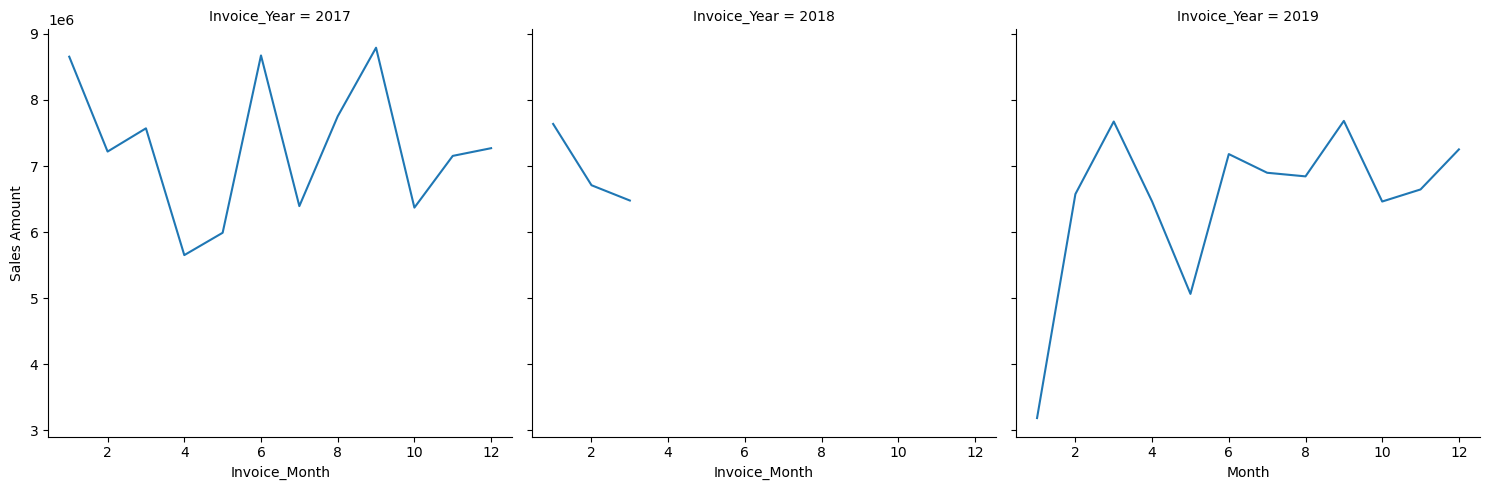

In [75]:
# Creating a line plot for 'Sales Amount' across months, faceted by 'Invoice Year'
sns.relplot(x = 'Invoice_Month', y = 'Sales Amount', data = Yearly_Monthwise_Sales,
           kind = 'line', col = 'Invoice_Year')

plt.xlabel('Month')
plt.ylabel('Sales Amount')

# Displaying the plot
plt.show()

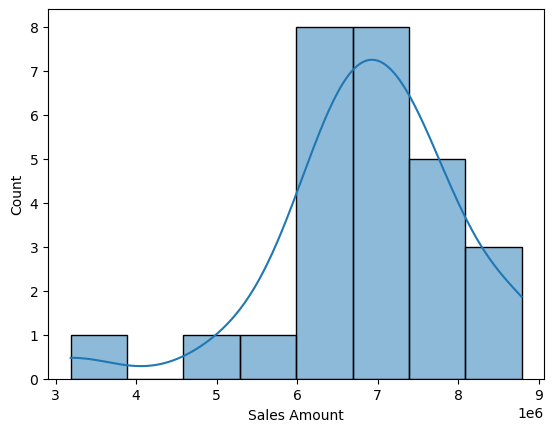

In [76]:
# Creating a histogram with KDE for 'Sales Amount'
sns.histplot(Yearly_Monthwise_Sales['Sales Amount'], kde = True)

# Displaying the plot
plt.show()

### Monthly Sales

In [82]:
# Grouping data by 'Invoice Year', 'Invoice Month', and 'Invoice Day', and summing the sales
Monthly_Sales = sales_data1.groupby(['Invoice_Year', 'Invoice_Month', 'Invoice_Day','Sales Quantity'])['Sales Amount'].sum().reset_index()

# Displaying summary statistics
Monthly_Sales.describe()

,Invoice_Year,Invoice_Month,Invoice_Day,Sales Quantity,Sales Amount
count,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000
mean,2017.969548,6.247995,15.911913,192.741384,13828.087284
std,0.946599,3.591453,8.763634,927.168346,33122.740206
min,2017.000000,1.000000,1.000000,1.000000,200.520000
25%,2017.000000,3.000000,8.000000,7.000000,1579.245000
50%,2018.000000,6.000000,16.000000,19.000000,5692.500000
75%,2019.000000,9.000000,24.000000,63.000000,13751.595000
max,2019.000000,12.000000,31.000000,16000.000000,555376.000000


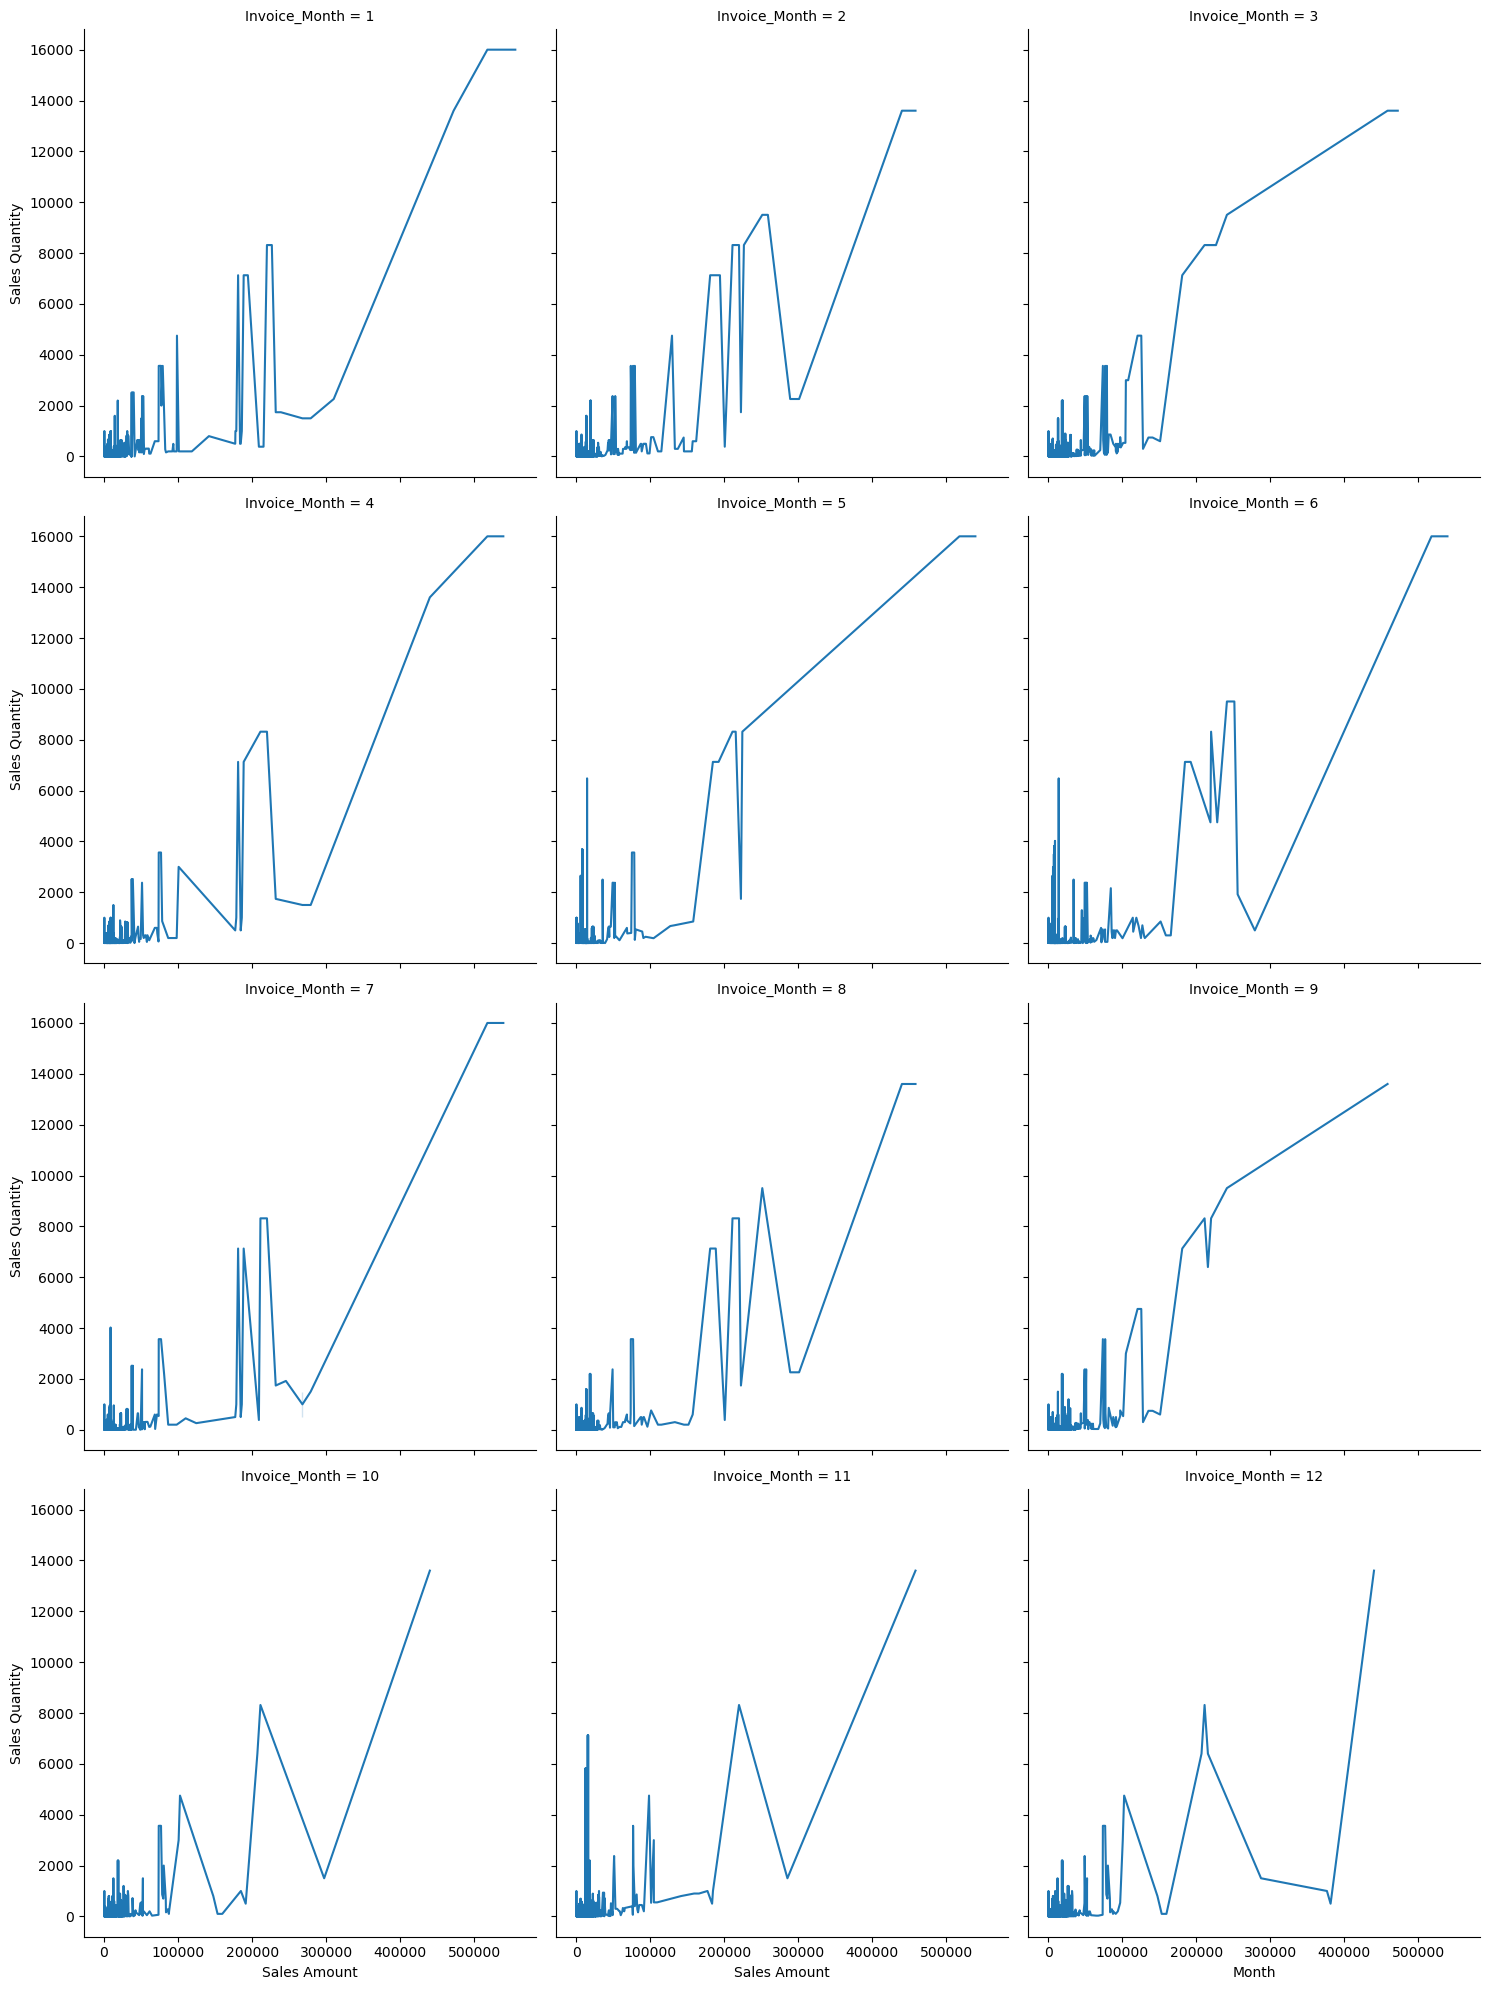

In [84]:
# Creating a line plot for 'Sales Amount' vs 'Sales Quantity', faceted by 'Invoice Month'
sns.relplot(x = 'Sales Amount', y = 'Sales Quantity', data = Monthly_Sales,
           kind = 'line', col = 'Invoice_Month', col_wrap = 3)
plt.xlabel('Month')
plt.ylabel('Sales Amount')

# Displaying the plot
plt.show()

### Profit Records

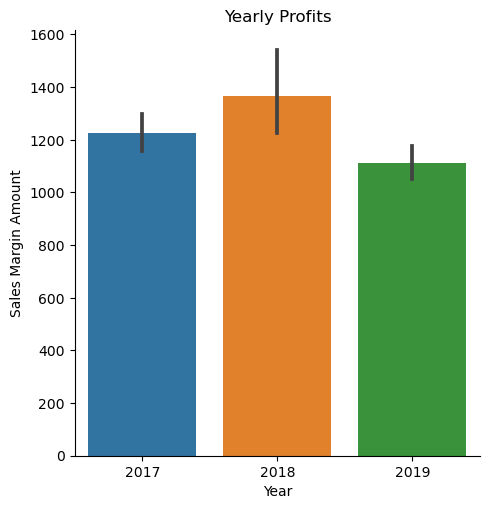

In [86]:
# Creating a bar plot for yearly profits (Sales Margin Amount)
sns.catplot(y = 'Sales Margin Amount', x = 'Invoice_Year', data = sales_data1, kind = "bar")
plt.xlabel('Year')
plt.ylabel('Sales Margin Amount')
plt.title('Yearly Profits')

# Displaying the plot
plt.show()

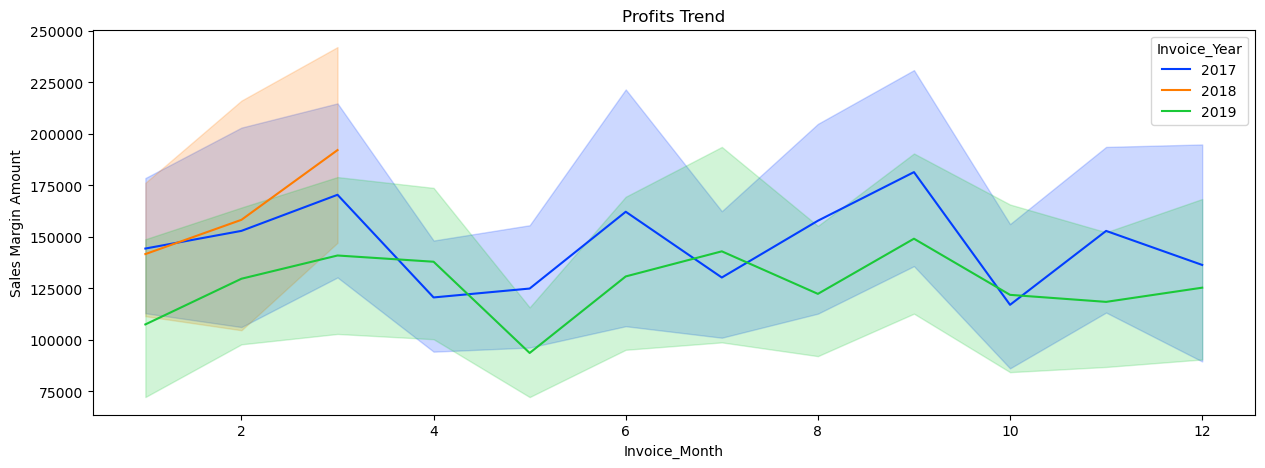

In [87]:
# Creating a line plot for profits trend, faceted by 'Invoice Year'
plt.figure(figsize = (15,5))
sns.lineplot(y = 'Sales Margin Amount', x = 'Invoice_Month',
            data = sales_data1.groupby(['Invoice Date', 'Invoice_Year', 'Invoice_Month']).sum(),
            hue = 'Invoice_Year', palette = 'bright')
plt.title('Profits Trend')

# Displaying the plot
plt.show()

In [90]:
numeric_columns = sales_data1.select_dtypes(include=['int64', 'float64']).columns
sales_data1_numeric = sales_data1[numeric_columns]


In [91]:
# calculates the Pearson correlation matrix for numerical columns
sales_data1_numeric.corr(method='pearson')


,CustKey,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price
CustKey,1.000000,0.031856,0.019042,0.004446,-0.021772,0.018221,0.019042,-0.160201,-0.007851,-0.007470
Sales Quantity,0.031856,1.000000,0.820925,0.638784,0.085401,0.722243,0.859719,0.048594,-0.095847,-0.091779
Sales Amount,0.019042,0.820925,1.000000,0.918649,0.425852,0.973165,0.989992,0.039115,-0.009787,-0.010740
Sales Amount Based on List Price,0.004446,0.638784,0.918649,1.000000,0.748668,0.914734,0.896738,0.029239,0.025658,0.012609
Discount Amount,-0.021772,0.085401,0.425852,0.748668,1.000000,0.461916,0.392464,0.001327,0.075184,0.046898
Sales Margin Amount,0.018221,0.722243,0.973165,0.914734,0.461916,1.000000,0.930953,0.041659,-0.002148,-0.000855
Sales Cost Amount,0.019042,0.859719,0.989992,0.896738,0.392464,0.930953,1.000000,0.036520,-0.014213,-0.016517
Sales Rep,-0.160201,0.048594,0.039115,0.029239,0.001327,0.041659,0.036520,1.000000,0.002807,0.032465
List Price,-0.007851,-0.095847,-0.009787,0.025658,0.075184,-0.002148,-0.014213,0.002807,1.000000,0.953445
Sales Price,-0.007470,-0.091779,-0.010740,0.012609,0.046898,-0.000855,-0.016517,0.032465,0.953445,1.000000


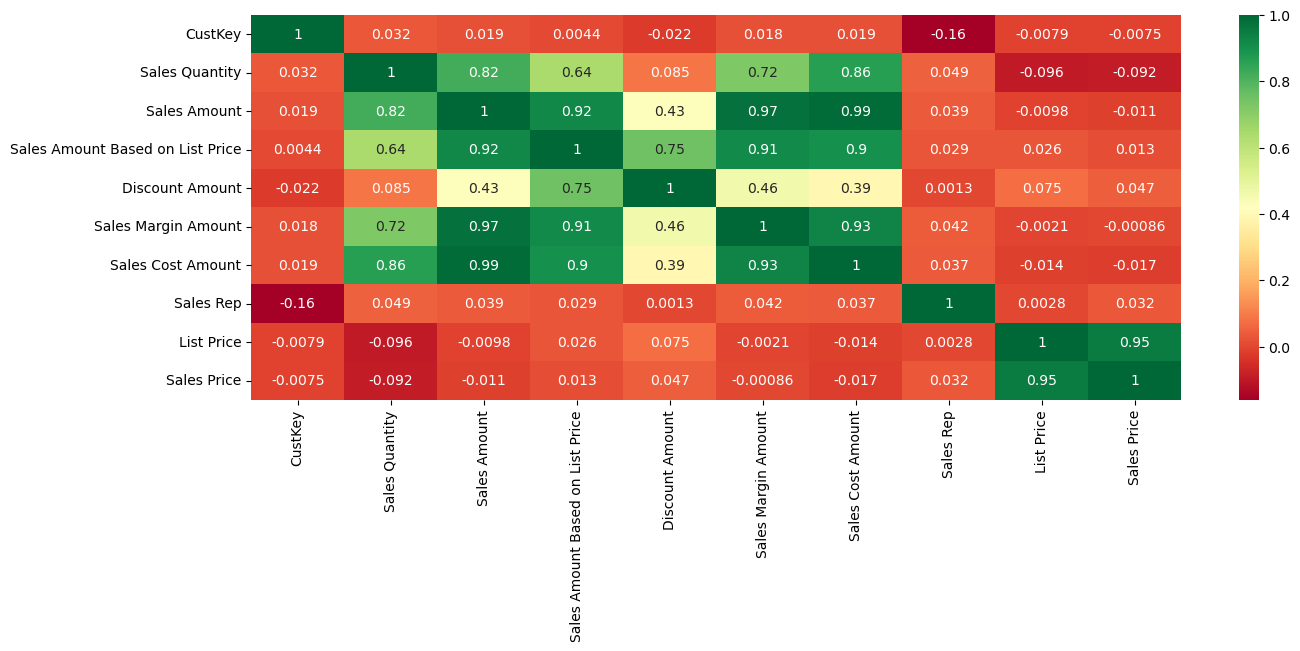

In [93]:
# Creating a heatmap of the correlation matrix
plt.figure(figsize = (15,5))
sns.heatmap(sales_data1_numeric.corr(), cmap='RdYlGn', annot=True)

# Displaying the plot
plt.show()

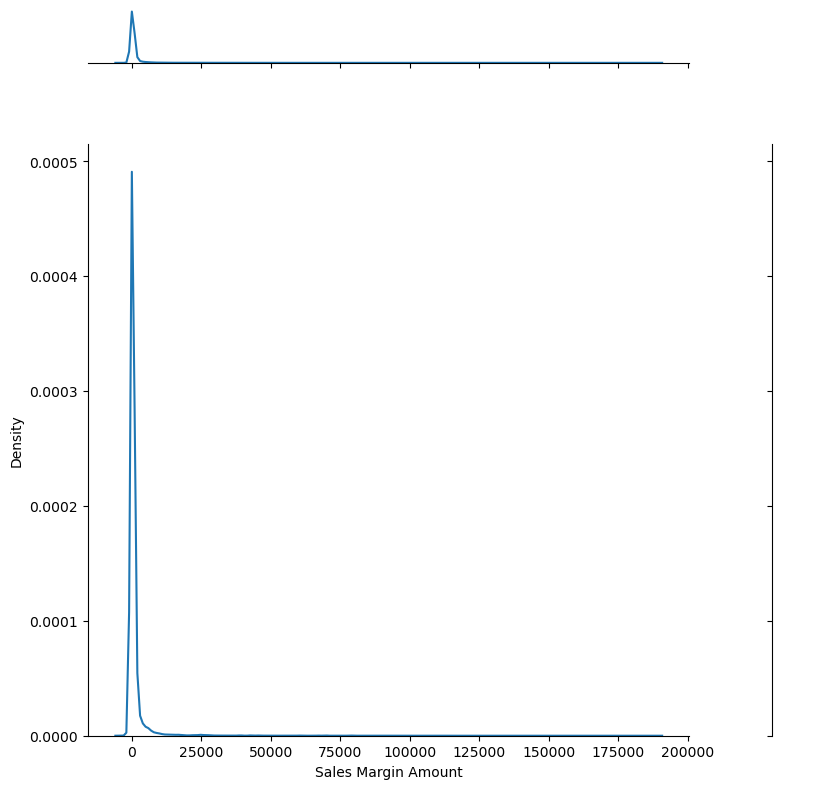

In [94]:
# Creating a joint plot for 'Sales Margin Amount' with kernel density estimates
sns.jointplot(x = 'Sales Margin Amount', data = sales_data1, height = 8, ratio = 5, kind = 'kde', space = 1.5)

# Displaying the plot
plt.show()